<a href="https://colab.research.google.com/github/keywoong/deeplearning_with_python/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Kaggle Cat vs Dog 데이터셋 준비하기


In [34]:
! wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-08-12 05:40:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.3MB/s    in 0.8s    

2021-08-12 05:40:26 (86.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import zipfile

local_zip = '../tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

경로 지정하기

In [37]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


## 2 Kaggle Dogs vs Cats 데이터셋 살펴보기

파일 이름과 개수 출력하기

In [38]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
# os.listdir()함수로 경로 내에 있는 파일의 이름을 리스트의 형태로 반환

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.422.jpg', 'cat.574.jpg', 'cat.767.jpg', 'cat.833.jpg', 'cat.156.jpg']
['dog.486.jpg', 'dog.62.jpg', 'dog.164.jpg', 'dog.291.jpg', 'dog.107.jpg']


이미지 확인하기

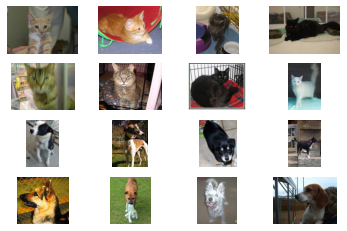

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4,4
pic_index = 0

fig = plt.gcf()
# fig 객체를 얻음

#fig.get_size_inches(ncols*3, nrows*3)
# fig의 사이즈 정함

pic_index +=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  # nrows*ncols subplot에 i+1번째 subplot을 뿌린다.
  sp.axis('Off')
  # 축의 속성을 Off로 설정해줌.

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 3. 모델 구성하기

In [40]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                                  
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

- Convolutional base<br>
입력받는 이미지의 크기 150x150사이즈로 받음.(RGB 3)<br>
필터의 개수를 16, 32 이런 식으로 계속 늘려줌.
- Classifier 부분 <br>
convolutional base 부분을 거쳐온 것들을 flatten시키고, 활성화시켜준 다음 sigmoid함수로 분류


## 3. 모델 컴파일하기

In [41]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer = RMSprop(lr = 0.001), 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


모델 컴파일 단계에서는 compile()함수를 이용해 손실함수(Loss Function)과 옵티마이더(Optimizer)를 지정한다.<br>
- 손실함수는 개 아니면 고양이이므로 **binary_crossentropy** 함수를 사용한다.<br>
- 옵티마이저는 **RMSprop**를 사용한다. 훈련 과정에서 학습률을 적절하게 변화시킨다.

## 4. 이미지 데이터전처리하기

훈련을 진행하기 전에, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 **데이터 전처리**를 진행한다.

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size = 20, class_mode = 'binary', target_size = (150,150)
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150,150)
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


NameError: ignored

**rescale()** : 원본 영상은 0-255 RGB 계수로 구성이 되는데, 이러한 값은 입력값으로 사용하기에는 숫자가 너무 높다. 그래서 이를 1/255로 스케일링하여 [0,1] 범위로 변환시켜준다.<br>
**flow_from_directory()** : 훈련과 테스트에 사용될 이미지 데이터를 증식시킬 수 있다. 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling을 해준다. (dog폴더에 있는 개 사진은 dog로 분류)<br>
- batch_size : 폴더 내에 있는 사진은 한번에 20(batch_size)장을 불러온다.<br>
- class_mode : 라벨링을 할 때 0또는 1(binary)로 한다.<br>
- target_size : 이미지를 150x150(target_size)의 크기로 라벨링하여 불러온다.


## 5. 모델 훈련시키기

In [44]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/50
100/100 - 8s - loss: 0.6614 - accuracy: 0.6385 - val_loss: 0.6706 - val_accuracy: 0.5860
Epoch 2/50
100/100 - 8s - loss: 0.5713 - accuracy: 0.7110 - val_loss: 0.5624 - val_accuracy: 0.7070
Epoch 3/50
100/100 - 8s - loss: 0.4804 - accuracy: 0.7765 - val_loss: 0.6272 - val_accuracy: 0.7150
Epoch 4/50
100/100 - 8s - loss: 0.4010 - accuracy: 0.8075 - val_loss: 0.6324 - val_accuracy: 0.7110
Epoch 5/50
100/100 - 8s - loss: 0.2972 - accuracy: 0.8670 - val_loss: 0.7832 - val_accuracy: 0.7110
Epoch 6/50
100/100 - 8s - loss: 0.2149 - accuracy: 0.9095 - val_loss: 0.8665 - val_accuracy: 0.7340
Epoch 7/50
100/100 - 8s - loss: 0.1555 - accuracy: 0.9405 - val_loss: 0.8810 - val_accuracy: 0.7180
Epoch 8/50
100/100 - 8s - loss: 0.1183 - accuracy: 0.9605 - val_loss: 1.1498 - val_accuracy: 0.6880
Epoch 9/50
100/100 - 8s - loss: 0.0790 - accuracy: 0.9775 - val_loss: 1.2612 - val_accuracy: 0.7310
Epoch 10/50
100/100 - 8s - loss: 0.0914 - accuracy: 0.9785 - val_loss: 1.4335 - val_accuracy: 0.7120

**fit()** 함수로 앞에서 구성한 NN 모델을 훈련시킨다.<br>
훈련과 테스트를 위한 데이터셋인 train_generator, validation_generator를 사용한다.<br>
- epochs : 데이터셋을 한번 훈련하는 과정, 전체 데이터를 epochs번 사용해서 학습을 거친다.
- steps_per_epochs : 한번의 epoch에서 훈련에 사용할 배치의 개수. 전체 데이터를 한번 학습시키는데 데이터를 몇 개로 쪼개서 학습시킬 것인가!
- validation_steps : 한번의 에포크가 끝날 때, 테스트에 사용되는 배치의 개수
- verbose mode: 0 is silent, 1 is progress bar, 2 is one line per epoch

## 6. 정확도와 손실 확인하기

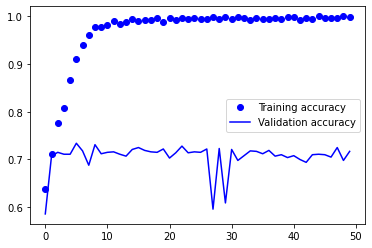

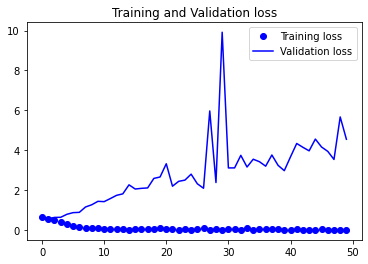

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

training 결과는 좋지만, validation 결과는 정확도나 손실값이 많이 부족함을 알 수 있다. (Overfitting, 과적합 현상)

## 7. 테스트 이미지 분류하기

아래의 테스트 이미지를 사용해서 훈련된 모델이 잘 분류할 수 있는지 확인해보자.

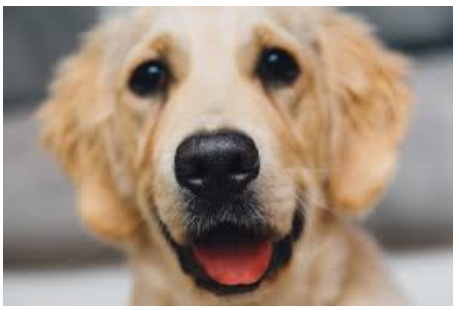

In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving test_image.png to test_image (1).png
[1.]
test_image.png is a dog
